## Wstęp

Netflix - to jedna z największych platform oferująca dostęp do filmów i seriali online. W Polsce wystartował jesienią 2016 roku. Użytkownicy mogą oglądać bez ograniczeń swoje ulubione programy na telefonie, tablecie, laptopie i telewizorze. Za korzystanie z usług jest pobierana miesięczna opłata.

## 1. Wstępne przetwarzanie danych

In [179]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv", encoding='latin1')

In [180]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,8809,8809,8809,6175,7984,7978,8799,8809.000000,8805,8806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unique,8809,2,8806,4529,7694,748,1768,NaN,18,220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,s1,Movie,22-Jul,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,6132,2,19,19,2819,109,NaN,3208,1794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.181292,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.818932,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
unique_values_count = df.nunique()
unique_values_count_table = unique_values_count.reset_index()
unique_values_count_table.columns = ['Column', 'Unique Values Count']
print(unique_values_count_table)

          Column  Unique Values Count
0        show_id                 8809
1           type                    2
2          title                 8806
3       director                 4529
4           cast                 7694
5        country                  748
6     date_added                 1768
7   release_year                   75
8         rating                   18
9       duration                  220
10     listed_in                  516
11   description                 8777
12   Unnamed: 12                    0
13   Unnamed: 13                    0
14   Unnamed: 14                    0
15   Unnamed: 15                    0
16   Unnamed: 16                    0
17   Unnamed: 17                    0
18   Unnamed: 18                    0
19   Unnamed: 19                    0
20   Unnamed: 20                    0
21   Unnamed: 21                    0
22   Unnamed: 22                    0
23   Unnamed: 23                    0
24   Unnamed: 24                    0
25   Unnamed

In [182]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
Unnamed: 12     8809
Unnamed: 13     8809
Unnamed: 14     8809
Unnamed: 15     8809
Unnamed: 16     8809
Unnamed: 17     8809
Unnamed: 18     8809
Unnamed: 19     8809
Unnamed: 20     8809
Unnamed: 21     8809
Unnamed: 22     8809
Unnamed: 23     8809
Unnamed: 24     8809
Unnamed: 25     8809
dtype: int64

In [183]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.9%
cast null rate: 9.37%
country null rate: 9.43%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%
Unnamed: 12 null rate: 100.0%
Unnamed: 13 null rate: 100.0%
Unnamed: 14 null rate: 100.0%
Unnamed: 15 null rate: 100.0%
Unnamed: 16 null rate: 100.0%
Unnamed: 17 null rate: 100.0%
Unnamed: 18 null rate: 100.0%
Unnamed: 19 null rate: 100.0%
Unnamed: 20 null rate: 100.0%
Unnamed: 21 null rate: 100.0%
Unnamed: 22 null rate: 100.0%
Unnamed: 23 null rate: 100.0%
Unnamed: 24 null rate: 100.0%
Unnamed: 25 null rate: 100.0%


## 2. Porządkowanie brakujących wartości

In [184]:
# Pozbycie się kulumn od 12 z pustymi wartościami
df = df[df.columns[:12]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [185]:
# Uzupełnianie brakujących wartości rating
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR', 'A'], dtype=object)

In [186]:
# Uzupełnianie brakujących wartości rating
allowed_ratings = ['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R', 'TV-G', 'G', 'NC-17', 'NR', 0, 'TV-Y7-FV', 'UR', 'A']

df['rating'] = df['rating'].apply(lambda x: x if x in allowed_ratings else 'Unknown')

In [187]:
# Uzupełnianie brakujących wartości release_year
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943, 2024])

In [188]:
# Uzupełnianie brakujących wartości duration
df['duration'].fillna('Unknown', inplace=True)

/tmp/ipykernel_1809/1779575315.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [189]:
# Uzupełnianie brakujących wartości director
df['director'].fillna('Unknown', inplace=True)

/tmp/ipykernel_1809/1812801374.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [190]:
# Uzupełnianie brakujących wartości cast
df['cast'].fillna('Unknown', inplace=True)

/tmp/ipykernel_1809/1789216245.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [191]:
# Uzupełnianie brakujących wartości country
df['country'].fillna('Unknown', inplace=True)

/tmp/ipykernel_1809/356177824.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [192]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      8809 non-null   object
 4   cast          8809 non-null   object
 5   country       8809 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8809 non-null   object
 9   duration      8809 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [193]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 3. Wizualizacja danych

### 1. Podział typów publikowanych treści

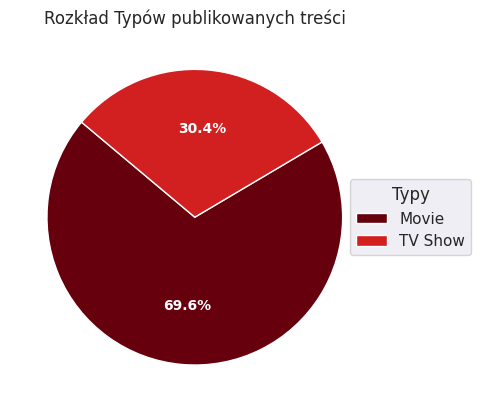

In [194]:
# Obliczanie liczby wartości
type_counts = df['type'].value_counts()

# Ustawienie palety kolorów
colors = ['#67000D', '#D21F20', '#FF5733']

# Tworzenie wykresu kołowego
fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(type_counts.values, labels=type_counts.index, colors=colors,
                                  autopct='%1.1f%%', startangle=140, textprops=dict(color="w"))

# Stylizacja wykresu
plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Rozkład Typów publikowanych treści")

# Dodanie legendy w języku polskim
ax.legend(wedges, type_counts.index,
          title="Typy",
          loc="center left",
          bbox_to_anchor=(0.9, 0, 0.5, 1))

# Dodanie tła
ax.set_facecolor('#F5F5F5')

# Wyświetlanie wykresu
plt.show()

Zdecydowana większość publikowanych treści to filmy.

### 2. Ocena filmów i programów

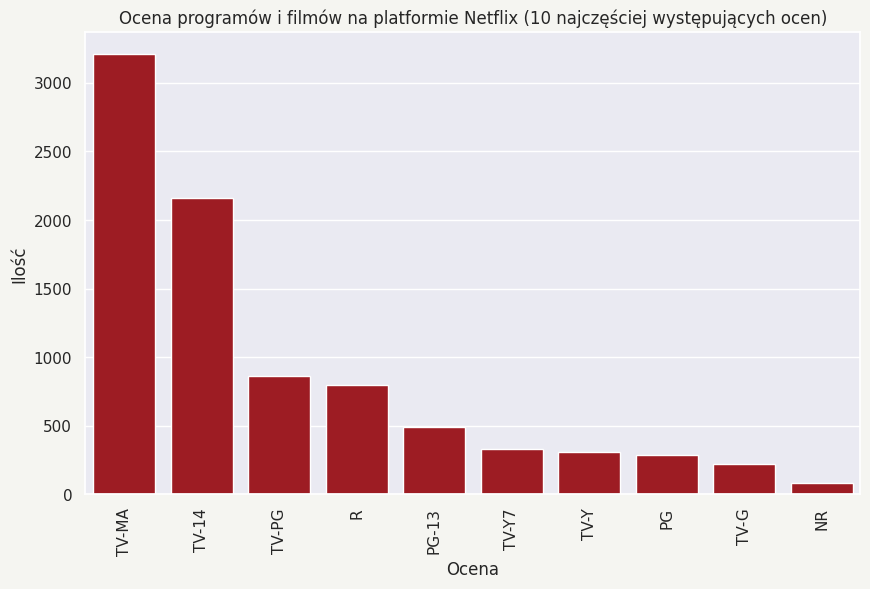

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Oblicz liczbę wystąpień każdej oceny i wybierz 10 najliczniejszych
top_ratings = df['rating'].value_counts().nlargest(10).index

# Filtruj dane, aby zawierały tylko 10 najliczniejszych ocen
filtered_df = df[df['rating'].isin(top_ratings)]

plt.figure(figsize=(10, 6), facecolor='#f5f5f1')
sns.countplot(data=filtered_df, x='rating', order=top_ratings, color='#b20710')
plt.xticks(rotation=90)
plt.xlabel('Ocena')
plt.ylabel('Ilość')
plt.title('Ocena programów i filmów na platformie Netflix (10 najczęściej występujących ocen)')
plt.show()

In [196]:
# Wyświetlanie ilości w kolejności malejącej przez print
rating_counts = filtered_df['rating'].value_counts().sort_index(ascending=False)
for rating in top_ratings:
    print(f"Ilość dla oceny {rating}: {rating_counts[rating]}")

plt.show()

Ilość dla oceny TV-MA: 3208
Ilość dla oceny TV-14: 2160
Ilość dla oceny TV-PG: 863
Ilość dla oceny R: 799
Ilość dla oceny PG-13: 490
Ilość dla oceny TV-Y7: 334
Ilość dla oceny TV-Y: 307
Ilość dla oceny PG: 287
Ilość dla oceny TV-G: 220
Ilość dla oceny NR: 80


Producenci są zobowiązani do oceny produkowanych przez siebie filmów i programów. Ocena ta odnosi się do treści w nich zawartych. Istnieją specjalne oznaczenia, aby było wiadomo czy dany film lub serial jest odpowiedni dla dzieci czy nie. Obecnie rozróżniamy następujące kategorie oceny:

a. TV Ratings:
- TV-Y: All Children - przeznaczony dla dzieci w wieku od 2 do 6 lat.
- TV-Y7: Directed to Older Children - przeznaczony dla dzieci w wieku 7 lat i starszych. Najlepiej nadaje się dla dzieci, które znają różnicę między prawdziwym życiem a fikcją.
- TV-Y7 FV: Directed to Older Children - fantasy Violence - Przeznaczony dla starszych dzieci. Zawiera przemoc w świecie fantasy.
- TV-G: General Audience - przeznaczony dla osób w każdym wieku. Zawiera niewielką ilość przemocy lub nie zawiera jej wcale.
- TV-PG: Parental Guidance Suggested - przeznaczony dla młodszych dzieci w towarzystwie osoby dorosłej.
- TV-14: Parents Strongly Cautioned - przeznaczony dla dzieci od 14 roku życia w towarzystwie osoby dorosłej.
- TV-MA: Mature Audience Only - przeznaczone dla dorosłych i mogą być nieodpowiednie dla dzieci poniżej 17 roku życia.

b. Ocena filmów:
- G: General Audiences - przeznaczone dla dorosłych i mogą być nieodpowiednie dla dzieci poniżej 17 roku życia.
- PG: Parental Guidance Suggested - sugierowana opieka rodzicielska.
- PG-13: Parents Strongly Cautioned - niektóre materiały mogą być nieodpowiednie dla dzieci poniżej 13 roku życia. 
- R: Restricted - ta ocena dotyczy filmów zaprojektowanych specjalnie do oglądania przez dorosłych i dlatego może być nieodpowiednia dla dzieci poniżej 17 roku życia.
- NC-17: Clearly Adult - ta ocena dotyczy filmów, które zdaniem większość rodziców są nieodpowiednie dla dzieci w wieku 17 lat i młodszych.

Po wizualizacji 10 najczęściej występujących ocen można stwierdzić, że najliczniejszą grupą są te, które są przeznaczone tylko dla dorosłych (TV-MA). Na drugim miejscu są filmy i seriale przeznaczone dla dieci od 14 roku życia w towarzystwie osoby dorosłej (TV-14), na trzecim przeznaczone dla młodszych dzieci w towarzystwie osoby dorosłej (TV-PG).

### 3. Ilość filmów publikowanych po 2000 roku

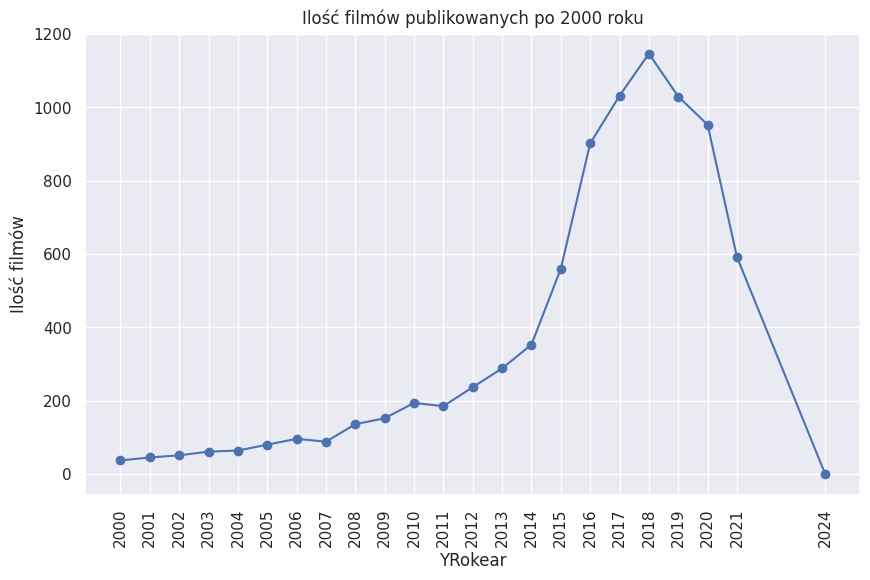

In [197]:
release_year_counts = df[df['release_year'] >= 2000]['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(release_year_counts.index, release_year_counts.values, marker='o')
plt.title('Ilość filmów publikowanych po 2000 roku')
plt.xlabel('YRokear')
plt.ylabel('Ilość filmów')
plt.grid(True)
plt.xticks(release_year_counts.index, rotation=90)  # Ensure all years are shown on the x-axis
plt.show()

Z wykresu zamieszczonego powyżej możemy odczytać lata w których zostało dodanych najwięcej tytułów na platformę Netflix. Najwięcej pojawiło się w roku 2019. Widać wyraźny wzrost dodawania filmów i seriali do biblioteki Netflix po roku 2015. Jednocześnie można stwierdzić, że ilość filmów po roku 2019 zaczęła spadać, może mieć to związek z panującym wówczas covid-19 i wstrzymaniem zdjęć do wielu produkcji. 

/tmp/ipykernel_1809/528294350.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




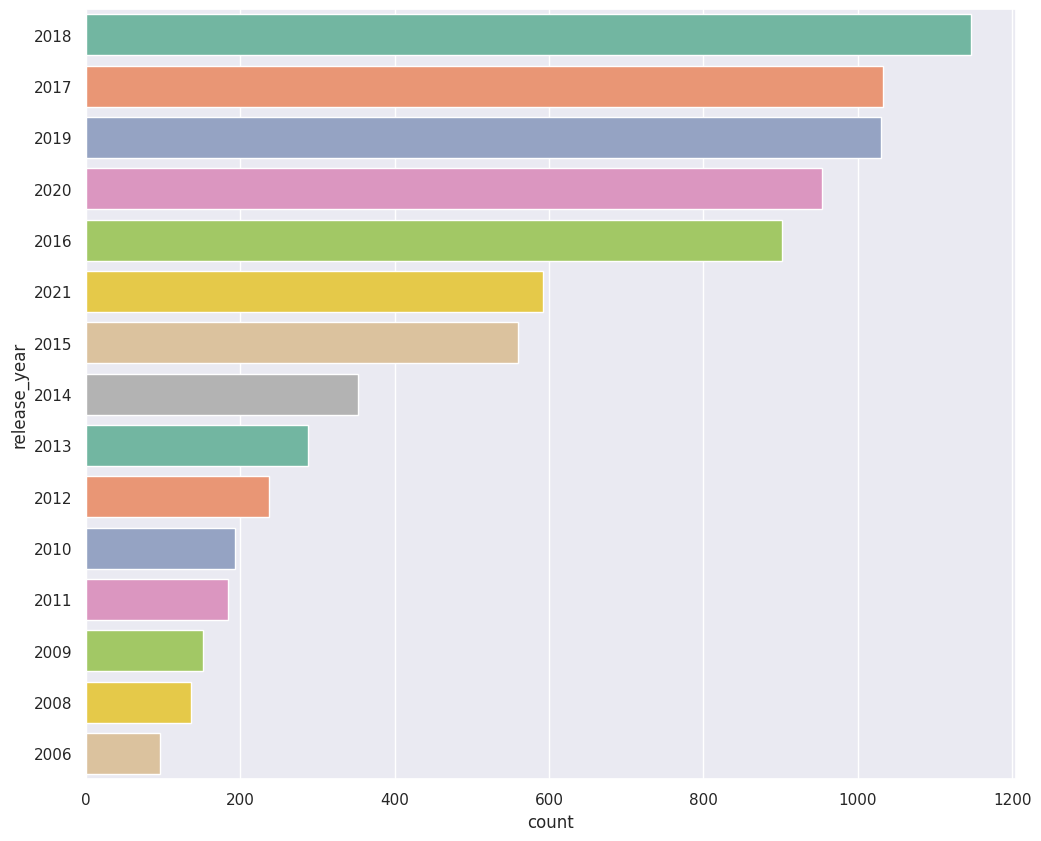

In [198]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df, palette="Set2", order=df['release_year'].value_counts().index[0:15])

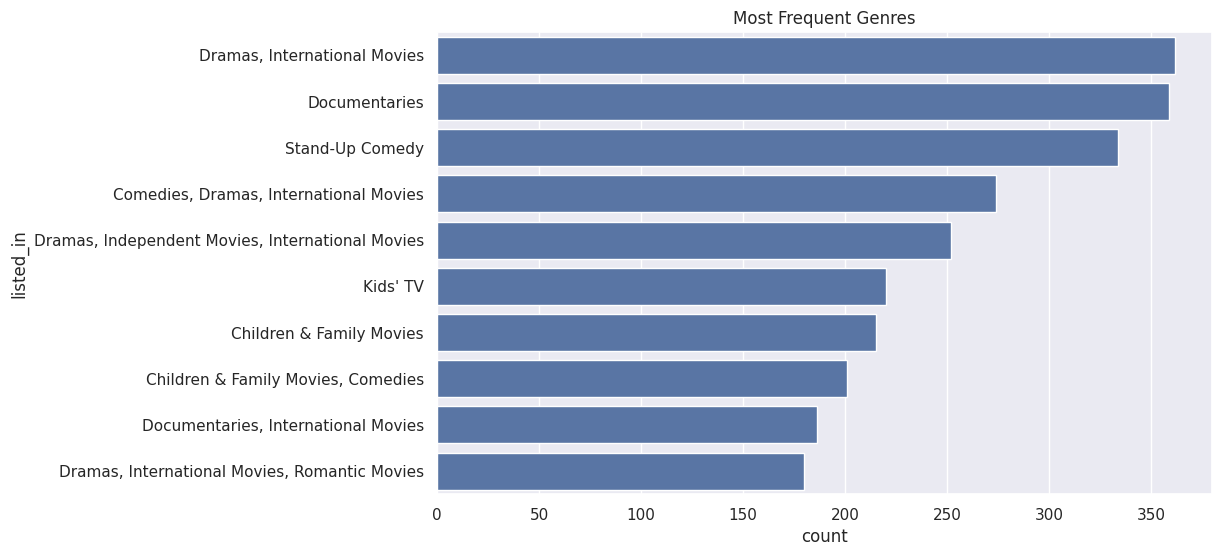

In [199]:
# Generate bar charts for the most frequent genres
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='listed_in', order=df['listed_in'].value_counts().index[:10])
plt.title('Most Frequent Genres')
plt.show()

## 4. Analiza treści

### 1. Przeanalizuj najczęstsze słowa w tytułach i opisach.

In [200]:
from collections import Counter
from wordcloud import WordCloud

title_words = ' '.join(df['title'].dropna()).lower().split()
description_words = ' '.join(df['description'].dropna()).lower().split()

title_word_count = Counter(title_words)
description_word_count = Counter(description_words)

# Wyświetlenie wartości dla tytułu
print(title_word_count.most_common(10))

[('the', 2227), ('of', 707), ('a', 352), ('in', 284), ('and', 234), ('to', 199), ('&', 179), ('love', 151), ('my', 144), ('2', 104)]


Najbardziej popularne słowa w tytułach to: the, of, a, in, and, to, &, love, my, 2.

In [201]:
# Wyświetlenie wartości dla opisu
print(description_word_count.most_common(10))

[('a', 11612), ('the', 8107), ('to', 6440), ('and', 6322), ('of', 5275), ('in', 4337), ('his', 3352), ('with', 2261), ('her', 2077), ('an', 1992)]


Najbardziej popularne słowa w opisach to: a, the, to, and, of, in, his, with, her, an

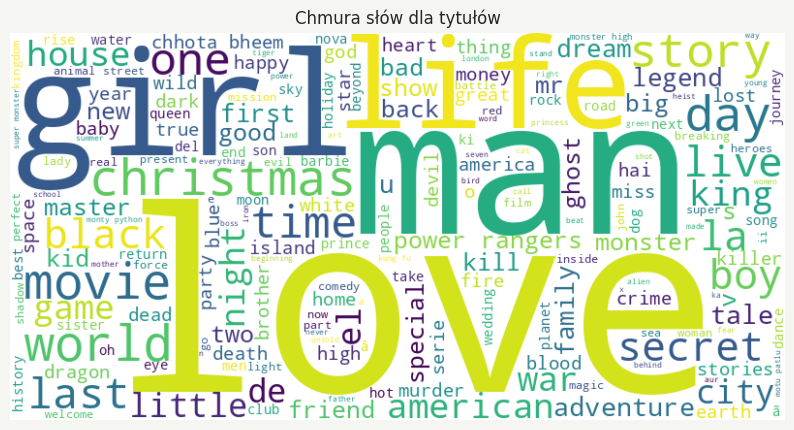

In [202]:
# Chmura słów dla tytułów
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(title_words))
plt.figure(figsize=(10, 6), facecolor='#f5f5f1')
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Chmura słów dla tytułów')
plt.show()

### 2. Określ średni czas trwania filmów i programów.

In [203]:
# Określ średni czas trwania filmów i programów
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)
average_duration = df.groupby('type')['duration'].mean()
print(average_duration)

type
Movie      99.578887
TV Show     1.764662
Name: duration, dtype: float64


Średnia długość filmu to 100 minut, natomiast średnia długość serialu to 1.7 sezonu.

### 3. Zidentyfikuj najczęściej występujących aktorów i reżyserów, którzy stworzyli najwięcej filmów.

In [204]:
# Zidentyfikuj najczęściej występujących aktorów i reżyserów, którzy stworzyli najwięcej filmów
most_prolific_actors = df['cast'].str.split(', ', expand=True).stack().value_counts()
most_prolific_directors = df['director'].str.split(', ', expand=True).stack().value_counts()
print(most_prolific_actors.head(10))

Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Name: count, dtype: int64


Najczęściej grający aktorzy to:
- Anupam Kher         43
- Shah Rukh Khan      35
- Julie Tejwani       33
- Takahiro Sakurai    32
- Naseeruddin Shah    32
- Rupa Bhimani        31
- Akshay Kumar        30
- Om Puri             30
- Yuki Kaji           29
- Paresh Rawal        28

In [205]:
print(most_prolific_directors.head(10))

Unknown                2634
Rajiv Chilaka            22
Jan Suter                21
RaÃºl Campos             19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Youssef Chahine          12
Jay Chapman              12
Name: count, dtype: int64


Reżyser który stworzył najwięcej filmów to Rajiv Chilaka z wynikiem 22 filmy, następni to:
- Jan Suter              21
- RaÃºl Campos           19
- Suhas Kadav            16
- Marcus Raboy           16
- Jay Karas              15
- Cathy Garcia-Molina    13
- Martin Scorsese        12
- Youssef Chahine        12
- Jay Chapman            12


## Analiza trendów

### 1. Śledź dodawanie różnych typów treści (filmy i programy telewizyjne) na przestrzeni czasu.

In [206]:
# Śledź dodawanie różnych typów treści (filmy i programy telewizyjne) na przestrzeni czasu.
content_type_trend = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
content_type_trend.plot(kind='line', figsize=(10, 6))
plt.title('Content Addition Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

KeyError: 'year_added'

### 2. Sprawdź sezonowe trendy w dodawaniu nowych tytułów.

In [ ]:
# Examine seasonal trends in the addition of new titles
df['month_added'] = df['date_added'].dt.month
seasonal_trend = df.groupby('month_added').size()
seasonal_trend.plot(kind='bar', figsize=(10, 6))
plt.title('Seasonal Trend in New Titles Added')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

## Analiza korelacji

### 1. Sprawdź związek między oceną treści a czasem trwania.

In [ ]:
# Filter the dataset for movies only
movies_df = df[df['type'] == 'Movie']

# Display the first few rows of the movies dataset
print(movies_df.head())

# Display the summary statistics of relevant columns
print(movies_df[['release_year', 'duration']].describe())

# Check for missing values in the relevant columns
print(movies_df[['release_year', 'duration']].isnull().sum())

# Extract duration as an integer
movies_df['duration'] = movies_df['duration'].str.extract('(\d+)').astype(float)

# Drop rows with missing values in 'release_year' or 'duration'
movies_df.dropna(subset=['release_year', 'duration'], inplace=True)

   show_id   type                             title  \
0       s1  Movie              Dick Johnson Is Dead   
6       s7  Movie  My Little Pony: A New Generation   
7       s8  Movie                           Sankofa   
9      s10  Movie                      The Starling   
12     s13  Movie                      Je Suis Karl   

                          director  \
0                  Kirsten Johnson   
6   Robert Cullen, JosÃ© Luis Ucha   
7                     Haile Gerima   
9                   Theodore Melfi   
12             Christian Schwochow   

                                                 cast  \
0                                                 NaN   
6   Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis NiewÃ¶hner, Milan Peschel,...   

                                              country          date_added  \
0                   

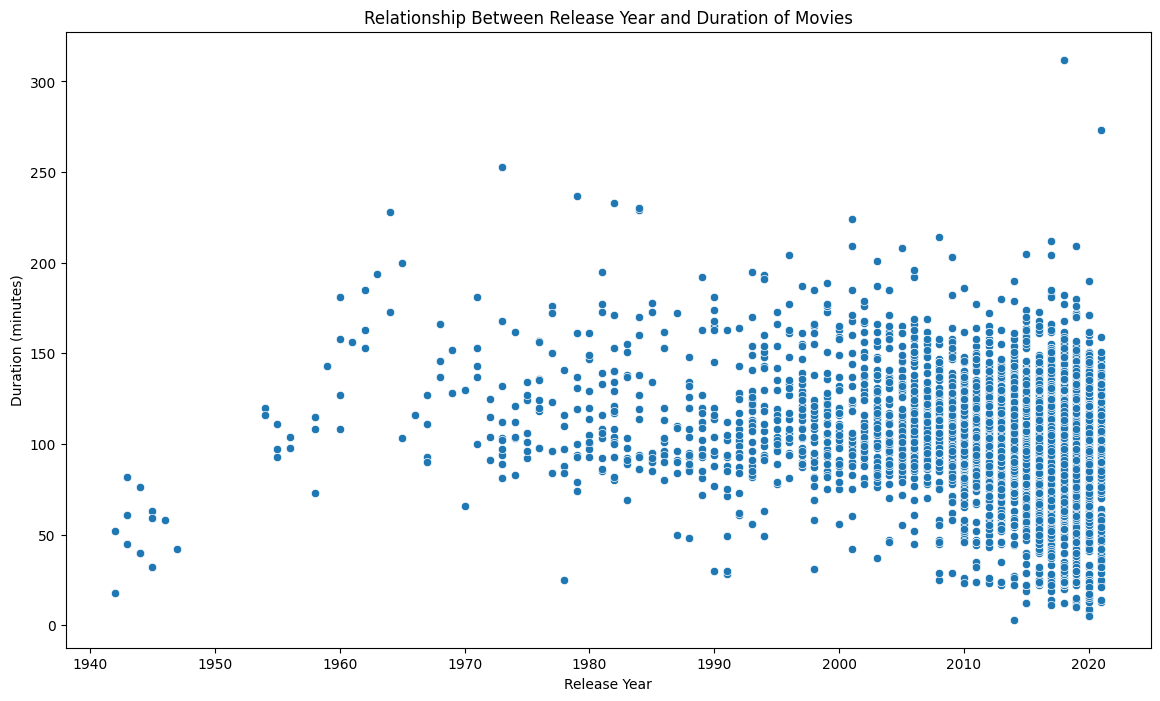

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Korrelacja między rokiem wydania filmu a czasem trwania
plt.figure(figsize=(14, 8))
sns.scatterplot(data=movies_df, x='release_year', y='duration')
plt.title('Relationship Between Release Year and Duration of Movies')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()



### 2. Zbadaj korelację między liczbą tytułów a ich ocenami.

In [ ]:
# Plot the average movie duration by release year
average_duration_per_year = movies_df.groupby('release_year')['duration'].mean()

plt.figure(figsize=(14, 8))
average_duration_per_year.plot(kind='line')
plt.title('Average Movie Duration by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.show()

# Display correlation between release year and duration
correlation = movies_df['release_year'].corr(movies_df['duration'])
print(f'Correlation between release year and duration: {correlation}')

In [ ]:
# Investigate the correlation between the number of titles and their ratings
ratings_count = df['rating'].value_counts()
plt.figure(figsize=(10, 6))
sns.regplot(x=ratings_count.index, y=ratings_count.values, marker='+')
plt.title('Correlation Between Number of Titles and Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Number of Titles')
plt.show()

## Zaawansowana analiza

## System rekomendacji w oparciu o gatunek

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['listed_in'].fillna(''))

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(df.index, index=df['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

print(get_recommendations('Breaking Bad'))

1477                         Dare Me
1980                   The Blacklist
2767                           Ozark
3762             Designated Survivor
5940                    Breaking Bad
8397    The Lizzie Borden Chronicles
714                      Beyond Evil
668                  Hap and Leonard
921                          StartUp
1933                       Wentworth
Name: title, dtype: object


In [ ]:
print(get_recommendations('Peaky Blinders'))

1166       The Irregulars
1217              The One
1991         Criminal: UK
2184             Get Even
2530          White Lines
2979         THE STRANGER
3034          Giri / Haji
3452       Peaky Blinders
3502    Criminal: Germany
3503      Criminal: Spain
Name: title, dtype: object
